### ChatGPT Google Reviews Analysis

#### *Import Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

2024-07-30 21:36:06.167826: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 21:36:06.167985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 21:36:06.339686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


#### *Import data*

In [2]:
dx = pd.read_csv('/kaggle/input/chatgpt-reviews-daily-updated/chatgpt_reviews.csv')

In [3]:
dx.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,922809e7-99d7-4bd9-a785-7d2afee46152,Oluwadamifunre Ilori,good but try to simplify because of junior stu...,5,0,1.2024.206,2024-07-29 20:03:34,1.2024.206
1,b9308165-7340-4bd5-8600-263bc704c891,M. Kay,Is very political. It suppresses information. ...,2,0,1.2024.206,2024-07-29 20:02:32,1.2024.206
2,61f79aa1-991e-4a6d-8805-8c8462ef4a3f,Kutiski Edits,i love it,5,0,1.2024.206,2024-07-29 20:01:29,1.2024.206
3,48e6d479-d719-4a20-9559-c807336b904a,Saalim,Cool but so laggy also add update of image pro...,3,0,1.2024.206,2024-07-29 19:59:43,1.2024.206
4,2c8520b8-9ff1-426c-95f4-d80eac2268b6,Deepak Shahu,nice source of knowledge,1,0,1.2024.198,2024-07-29 19:56:09,1.2024.198


In [4]:
dx.size

1398392

In [5]:
df = dx.sample(10000)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
147070,cd28b0ed-2ef1-4619-9c02-b4f1e08053c4,zionheart reyesbuenafe,nagmayat okinnana dabest,5,0,1.2024.073,2024-03-25 10:58:32,1.2024.073
111022,f14049b5-8cd6-4225-99a9-1dcc9d79e274,Shahid Processors,It's a nice app for debate and essay and whate...,5,0,1.2023.263,2023-10-06 15:03:30,1.2023.263
97583,19d31cbe-f981-47f3-a552-88471f521329,Albin Gaming,I love this app it's so good legit the best an...,5,0,1.0.0039,2023-09-05 14:05:20,1.0.0039
19429,6b230933-2f4f-4e3b-b27b-2870568dffa8,sedik lmbo,🥰😘Amazing application Thank you for this amazi...,5,0,1.2024.170,2024-07-05 09:58:31,1.2024.170
168312,9106eec5-cacd-47a6-a5de-b23d3481b895,Godwin Obozuwa,Not opening,1,0,1.0.0032,2023-08-12 09:17:18,1.0.0032


In [6]:
df.rename(columns = {
    'reviewId' : 'review_id',
    'userName' : 'user_name',
    'thumbsUpCount' : 'thumbs_up_count',
    'reviewCreatedVersion' : 'review_created_version',
    'appVersion' : 'app_version'
    
}, inplace = True)

In [7]:
df.columns

Index(['review_id', 'user_name', 'content', 'score', 'thumbs_up_count',
       'review_created_version', 'at', 'app_version'],
      dtype='object')

In [8]:
df.shape

(10000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 147070 to 35355
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               10000 non-null  object
 1   user_name               10000 non-null  object
 2   content                 9999 non-null   object
 3   score                   10000 non-null  int64 
 4   thumbs_up_count         10000 non-null  int64 
 5   review_created_version  9213 non-null   object
 6   at                      10000 non-null  object
 7   app_version             9213 non-null   object
dtypes: int64(2), object(6)
memory usage: 703.1+ KB


In [10]:
df.isnull().sum()

review_id                   0
user_name                   0
content                     1
score                       0
thumbs_up_count             0
review_created_version    787
at                          0
app_version               787
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,4.4944,1.106025,1.0,5.0,5.0,5.0,5.0
thumbs_up_count,10000.0,0.4735,10.918774,0.0,0.0,0.0,0.0,700.0


In [12]:
df = df.drop_duplicates()

In [13]:
df = df.dropna()

In [14]:
df.shape

(9204, 8)

In [15]:
df.head()

,review_id,user_name,content,score,thumbs_up_count,review_created_version,at,app_version
147070,cd28b0ed-2ef1-4619-9c02-b4f1e08053c4,zionheart reyesbuenafe,nagmayat okinnana dabest,5,0,1.2024.073,2024-03-25 10:58:32,1.2024.073
111022,f14049b5-8cd6-4225-99a9-1dcc9d79e274,Shahid Processors,It's a nice app for debate and essay and whate...,5,0,1.2023.263,2023-10-06 15:03:30,1.2023.263
97583,19d31cbe-f981-47f3-a552-88471f521329,Albin Gaming,I love this app it's so good legit the best an...,5,0,1.0.0039,2023-09-05 14:05:20,1.0.0039
19429,6b230933-2f4f-4e3b-b27b-2870568dffa8,sedik lmbo,🥰😘Amazing application Thank you for this amazi...,5,0,1.2024.170,2024-07-05 09:58:31,1.2024.170
168312,9106eec5-cacd-47a6-a5de-b23d3481b895,Godwin Obozuwa,Not opening,1,0,1.0.0032,2023-08-12 09:17:18,1.0.0032


In [16]:
df['score'].value_counts()

score
5    7157
4    1016
1     504
3     387
2     140
Name: count, dtype: int64

In [17]:
df['thumbs_up_count'].value_counts()

thumbs_up_count
0      8917
1       161
2        34
3        18
5         9
4         8
7         5
6         3
8         3
13        3
14        3
24        3
9         3
11        2
50        2
55        2
18        1
250       1
53        1
12        1
122       1
62        1
216       1
265       1
78        1
700       1
19        1
17        1
34        1
61        1
161       1
480       1
65        1
164       1
273       1
170       1
29        1
82        1
22        1
76        1
60        1
232       1
26        1
113       1
Name: count, dtype: int64

#### *Data Visulation*

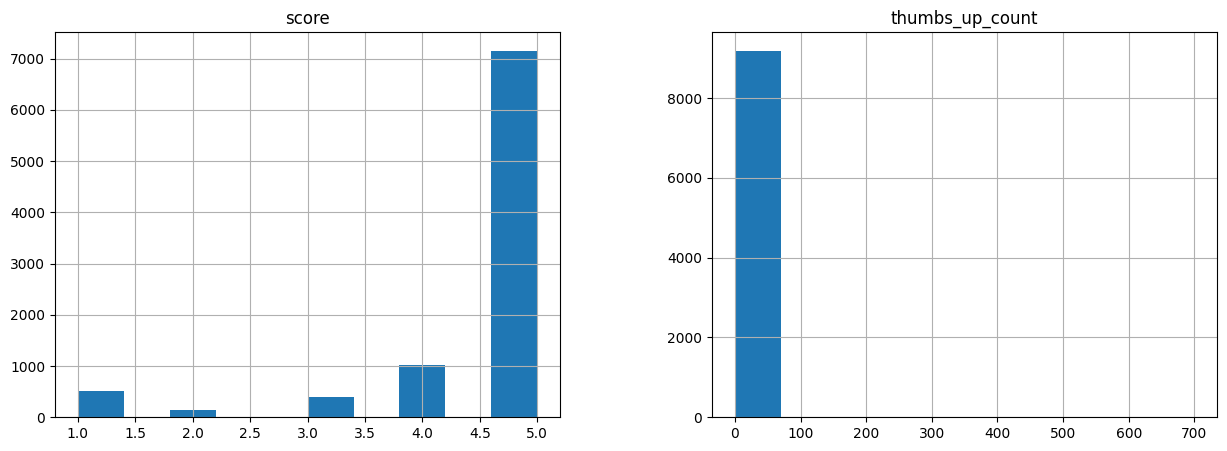

In [18]:
df.hist(figsize = (15,5))
plt.show()

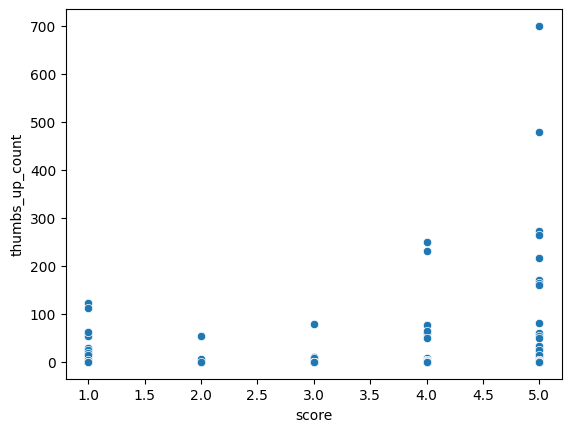

In [19]:
sns.scatterplot(x = 'score', y = 'thumbs_up_count', data = df)
plt.show()

#### *Feature Engineering*

In [20]:
df.drop(columns = ['review_id', 'user_name', 'at'], inplace = True)

In [21]:
df.head()

,content,score,thumbs_up_count,review_created_version,app_version
147070,nagmayat okinnana dabest,5,0,1.2024.073,1.2024.073
111022,It's a nice app for debate and essay and whate...,5,0,1.2023.263,1.2023.263
97583,I love this app it's so good legit the best an...,5,0,1.0.0039,1.0.0039
19429,🥰😘Amazing application Thank you for this amazi...,5,0,1.2024.170,1.2024.170
168312,Not opening,1,0,1.0.0032,1.0.0032


#### *Label Encoding*

In [22]:
le = LabelEncoder()
df['review_created_version'] = le.fit_transform(df['review_created_version'])

In [23]:
oe = OrdinalEncoder()
df['app_version'] = oe.fit_transform(df[['app_version']])

In [24]:
df.head()

,content,score,thumbs_up_count,review_created_version,app_version
147070,nagmayat okinnana dabest,5,0,40,40.0
111022,It's a nice app for debate and essay and whate...,5,0,12,12.0
97583,I love this app it's so good legit the best an...,5,0,8,8.0
19429,🥰😘Amazing application Thank you for this amazi...,5,0,58,58.0
168312,Not opening,1,0,6,6.0


#### *Applying NLP*

In [25]:
df['content']

147070                             nagmayat okinnana dabest
111022    It's a nice app for debate and essay and whate...
97583     I love this app it's so good legit the best an...
19429     🥰😘Amazing application Thank you for this amazi...
168312                                          Not opening
                                ...                        
145578                                         Soo detailed
137442                                                 good
14443                                         working smart
118431                        This app is free and amazing!
35355     Mujhe kuch khas nahin laga yeh app. Mene esse ...
Name: content, Length: 9204, dtype: object

In [26]:
df['content'] = df['content'].str.lower()
df['content']

147070                             nagmayat okinnana dabest
111022    it's a nice app for debate and essay and whate...
97583     i love this app it's so good legit the best an...
19429     🥰😘amazing application thank you for this amazi...
168312                                          not opening
                                ...                        
145578                                         soo detailed
137442                                                 good
14443                                         working smart
118431                        this app is free and amazing!
35355     mujhe kuch khas nahin laga yeh app. mene esse ...
Name: content, Length: 9204, dtype: object

In [27]:
def remove_html_tags(text):
    clean_text = re.sub('<.*>', '', text)
    return clean_text

df['content'] = df['content'].apply(remove_html_tags)
df['content'].head(20)

147070                             nagmayat okinnana dabest
111022    it's a nice app for debate and essay and whate...
97583     i love this app it's so good legit the best an...
19429     🥰😘amazing application thank you for this amazi...
168312                                          not opening
25961                                        it is so sweet
112909       very informative app to give perfect knowledge
146628                                          awesomeness
14834                 ok but 4.0 must have unlimited access
112462    very good site for pharma learners. one should...
96998     this app is very useful for questions solving ...
20428                                                  good
3389                                         respective a.i
65301     l good game but... i dowload this in my comput...
138337    good h ji, abhi time h ai ke pass apni maarne ...
146421                                              is nice
160932                                  

In [28]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    clean_text = re.sub(url_pattern, '', text)
    return clean_text

df['content'] = df['content'].apply(remove_urls)
df['content'].head(20)

147070                             nagmayat okinnana dabest
111022    it's a nice app for debate and essay and whate...
97583     i love this app it's so good legit the best an...
19429     🥰😘amazing application thank you for this amazi...
168312                                          not opening
25961                                        it is so sweet
112909       very informative app to give perfect knowledge
146628                                          awesomeness
14834                 ok but 4.0 must have unlimited access
112462    very good site for pharma learners. one should...
96998     this app is very useful for questions solving ...
20428                                                  good
3389                                         respective a.i
65301     l good game but... i dowload this in my comput...
138337    good h ji, abhi time h ai ke pass apni maarne ...
146421                                              is nice
160932                                  

In [29]:
def remove_punc(text):
    punc = string.punctuation
    clean_text = text.translate(str.maketrans('','', punc))
    return clean_text

df['content'] = df['content'].apply(remove_punc)
df['content'].head(20)

NameError: name 'string' is not defined

In [ ]:
chat_words_mapping = {
    "lol": "laughing out loud",
    "brb": "be right back",
    "btw": "by the way",
    "afk": "away from keyboard",
    "rofl": "rolling on the floor laughing",
    "ttyl": "talk to you later",
    "np": "no problem",
    "thx": "thanks",
    "omg": "oh my god",
    "idk": "I don't know",
    "np": "no problem",
    "gg": "good game",
    "g2g": "got to go",
    "b4": "before",
    "cu": "see you",
    "yw": "you're welcome",
    "wtf": "what the f*ck",
    "imho": "in my humble opinion",
    "jk": "just kidding",
    "gf": "girlfriend",
    "bf": "boyfriend",    "u": "you",
    "r": "are",
    "2": "to",
    "4": "for",
    "b": "be",
    "c": "see",
    "y": "why",
    "tho": "though",
    "smh": "shaking my head",
    "lolz": "laughing out loud",
    "h8": "hate",
    "luv": "love",
    "pls": "please",
    "sry": "sorry",
    "tbh": "to be honest",
    "omw": "on my way",
    "omw2syg": "on my way to see your girlfriend",
}

def expand_chat_words(text):
    words = text.split()
    expanded_words = [chat_words_mapping.get(word.lower(), word) for word in words]
    return ' '.join(expanded_words)

df['content'] = df['content'].apply(expand_chat_words)
df['content'].head(20)

In [ ]:
def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = ''.join(filtered_tokens)
    return preprocessed_text

In [ ]:
df['content'] = df['content'].apply(remove_stop_words)
df['content']

In [ ]:
def replace_emojis_with_meanings(text):
    def replace(match):
        emoji_char = match.group()
        emoji_meaning = emoji.demojize(emoji_char)
        return emoji_meaning

    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U0001F1E0-\U0001F1FF"
                            u"\U00002500-\U00002BEF"
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"
                            u"\u3030"
                            "]+", flags=re.UNICODE)
    text_with_meanings = emoji_pattern.sub(replace, text)
    return text_with_meanings

In [ ]:
df['content'] = df['content'].apply(replace_emojis_with_meanings)
df['content']

In [ ]:
def word_tokenization(text):
    return nltk.word_tokenize(text)

In [ ]:
df['token_content'] = df['content'].apply(word_tokenization)
df['token_content']

#### *POS Taging*

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'textcat'])

def batch_pos_tagging(texts):
    docs = list(nlp.pipe(texts, batch_size=50))
    return [[(token.text, token.pos_) for token in doc] for doc in docs]

batch_size = 50
num_batches = len(df) // batch_size + 1

pos_tags = []
for i in tqdm(range(num_batches)):
    start = i * batch_size
    end = start + batch_size
    batch_texts = df['content'][start:end].tolist()
    pos_tags.extend(batch_pos_tagging(batch_texts))

df['POS_Tags'] = pos_tags

In [ ]:
df.rename(columns={'POS_Tags': 'pos_tags'}, inplace=True)

In [ ]:
df['pos_tags']

In [ ]:
df.head(20)

#### *Bag of Words*

In [ ]:
df['content'] = df['content'].apply(lambda x: ' '.join(x) 
                                    if isinstance(x, list) 
                                    else x)
df['token_content'] = df['token_content'].apply(lambda x: ' '.join(x) 
                                                if isinstance(x, list) 
                                                else x)
df['pos_tags'] = df['pos_tags'].apply(lambda x: ' '.join(str(i) for i in x) 
                                      if isinstance(x, list) 
                                      else x)

vectorizer = CountVectorizer(ngram_range = (2,2))

bow_c = vectorizer.fit_transform(df['content'])
bow_t = vectorizer.fit_transform(df['token_content'])
bow_p = vectorizer.fit_transform(df['pos_tags'])

df['content'] = bow_c.toarray()
df['token_content'] = bow_t.toarray()
df['pos_tags'] = bow_p.toarray()

In [ ]:
df.head(20)

#### *Train Test Split*

In [ ]:
X = df.drop(columns=['score'])
y = df['score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

#### *Decision Tree Classifier*

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
y_pred = (dt.predict(X_test))

In [ ]:
print(classification_report(y_test, y_pred, zero_division = 0))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

fig, ax = plt.subplots(figsize = (5,5))
cm_display.plot(ax = ax)
plt.title('Confusion Matrix')
plt.show()

#### *Random Forest Classifier*

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, zero_division = 0))

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)

fig, ax = plt.subplots(figsize = (5,5))
cm1_display.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

#### *Support Vector Machines*

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
y_pred = svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, zero_division = 0))

In [ ]:
cm2 = confusion_matrix(y_test, y_pred)
cm2_display = ConfusionMatrixDisplay(confusion_matrix = cm2)

fig, ax = plt.subplots(figsize = (5,5))
cm2_display.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

#### *KNN*

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, zero_division = 0))

#### *GridSearchCV for KNN*

In [ ]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 25, 50, 75, 100]}

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
best_k = grid_search.best_params_['n_neighbors']
print("Best k Value:", best_k)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=50)

In [ ]:
knn1.fit(X_train, y_train)

In [ ]:
y_pred1 = knn1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred1, zero_division=0))